
# Data Analysis on Airline Passenger Satisfaction

#### This dataset was downloaded from kaggle.com
#### By Daniel Payan

In this notebook, we will **manipulate**, **analyze**, and **visualize** airline passenger data to draw insights on what the biggest influencers on customer satisfaction were, such as, flight delay time, in-flight amenities, and demographic information. <br>This EDA will be **part 1** of this project, with **part 2** being located in my **Machine Learning Repo** under the same project name. <br>(Part 2 will cover clustering passengers and identifying the most influential features on satisfaction)

This notebook has one CSV file, ***airline_passenger_satisfaction.csv***, which will be stored using a pandas DataFrame. For data visualization, we will be using seaborn, plotly.express, and matplotlib, and numpy for mathematical functions.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sb

In [78]:
#Read data into pandas DataFrame
airline_df = pd.read_csv('Data/airline_passenger_satisfaction.csv')
#The dataset has 129880 records with 24 attributes
airline_df.shape

(129880, 24)

#### First let's display the overall dataset to get an overall look at our data.

In [79]:
airline_df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


#### Here we get attribute info, in which we see we have:
> 5 categorical (object) attributes <br> & <br> 19 numerical (float/int) attributes
#### We also can see that we have a few missing values in the 'Arrival Delay' attribute

In [80]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

#### Here we get a more detailed look at our numerical attributes.
For example, we can see the standard deviation within each column, the mean value, percentile values, and also the min/max values. <br>
**Now we know the minimum age for a passenger in our dataset is 7, while the maximum age recorded is 85.**

In [81]:
airline_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [82]:
#We'll use the mean value from above to fill in those missing values in Arrival Delay.
airline_df = airline_df.fillna({'Arrival Delay':15.09})

In [83]:
#Now let's see the distribution of satisfied vs. neutral/dissatisfied customers
airline_df['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [84]:
#Now we can map these satisfaction values to a binary outcome, 1 being satisfied & 0 being neutral/dissatisfied
map_values = {'Satisfaction':{'Neutral or Dissatisfied':0,'Satisfied':1}}
airline_df = airline_df.replace(map_values)
#Let's check to make sure our mapping values went through
airline_df['Satisfaction'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Satisfaction, dtype: int64

#### Now that we have some information on our dataset, let's try and identify any correlation between our attributes and our outcome variable, 'Satisfaction', using a heatmap

C:\Users\d_p327\AppData\Local\Temp\ipykernel_13272\113934378.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 1.0, 'Correlation of Attributes')]

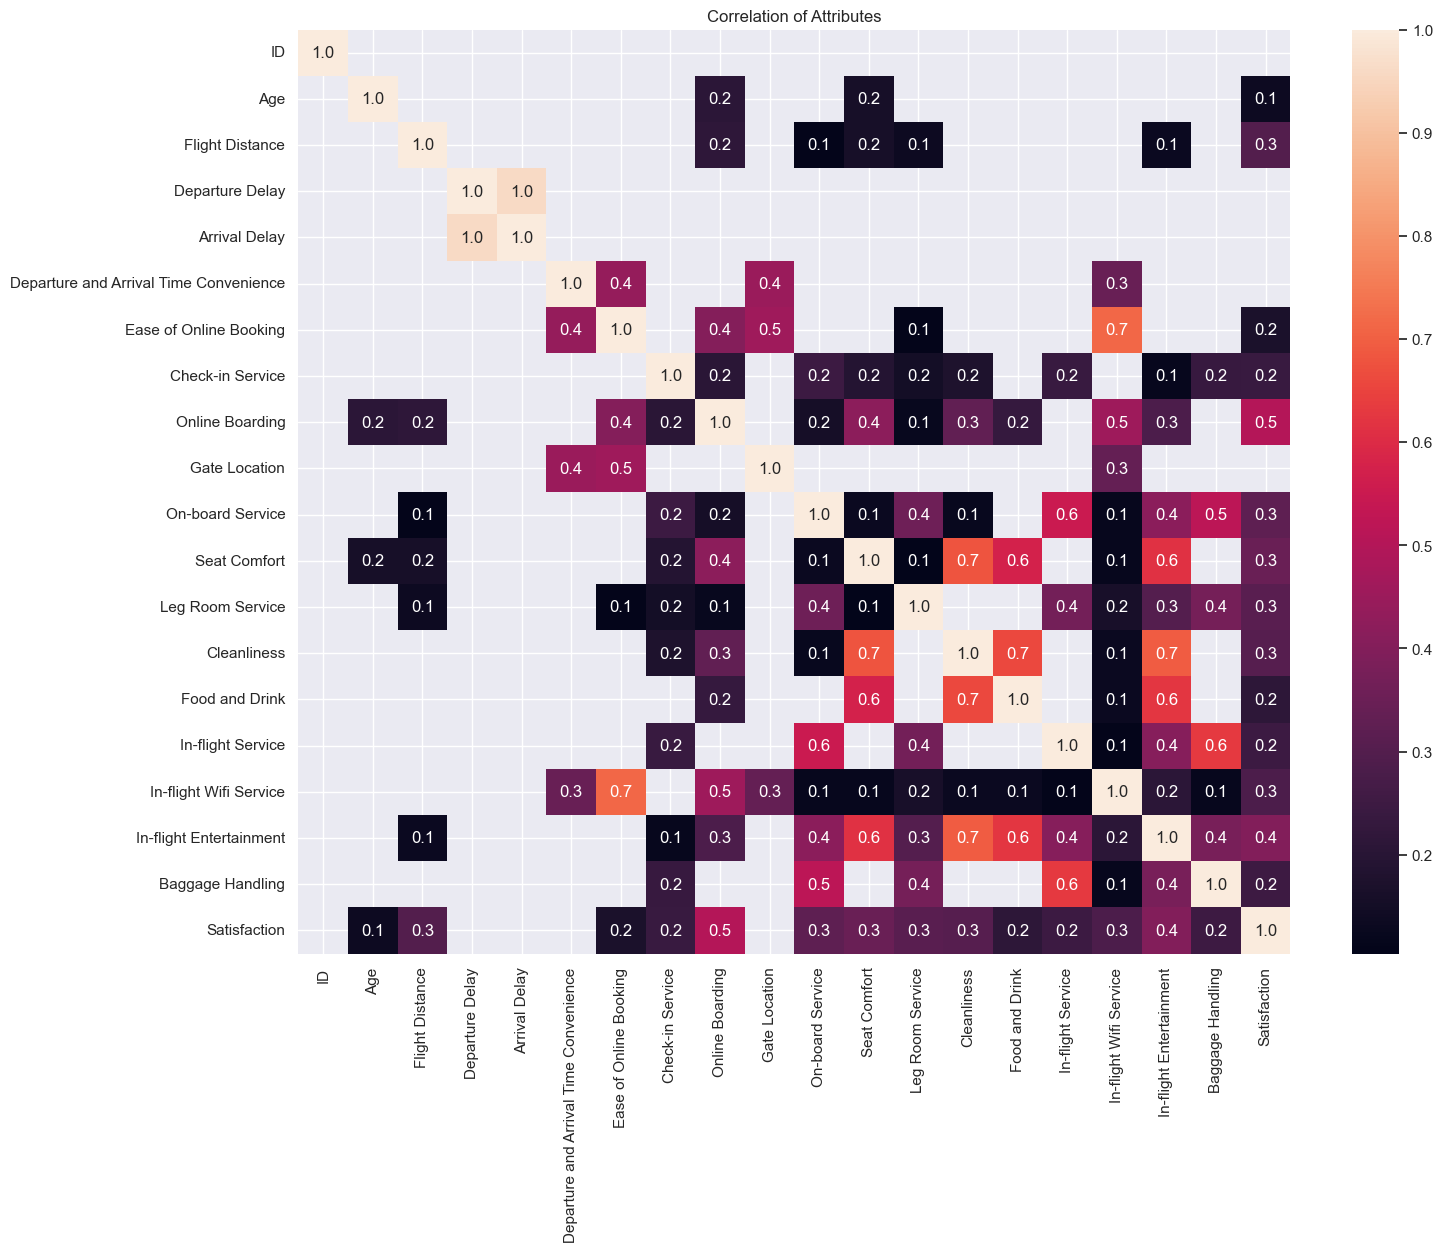

In [85]:
corr_matrix = airline_df.corr()
#This mask will allow us to determine a threshold, in this case 0.1,
#in which all values under this threshold will not be colored
mask = np.zeros_like(corr_matrix)
mask[corr_matrix<0.1] = True
sb.set(rc={'figure.figsize':(16,12)})
sb.heatmap(corr_matrix,mask=mask,annot=True,fmt=".1f").set(title='Correlation of Attributes')

#### Now let's plot some of these strong correlations we're seeing

[Text(0.5, 1.0, 'Satisfaction vs. In-flight Entertainment')]

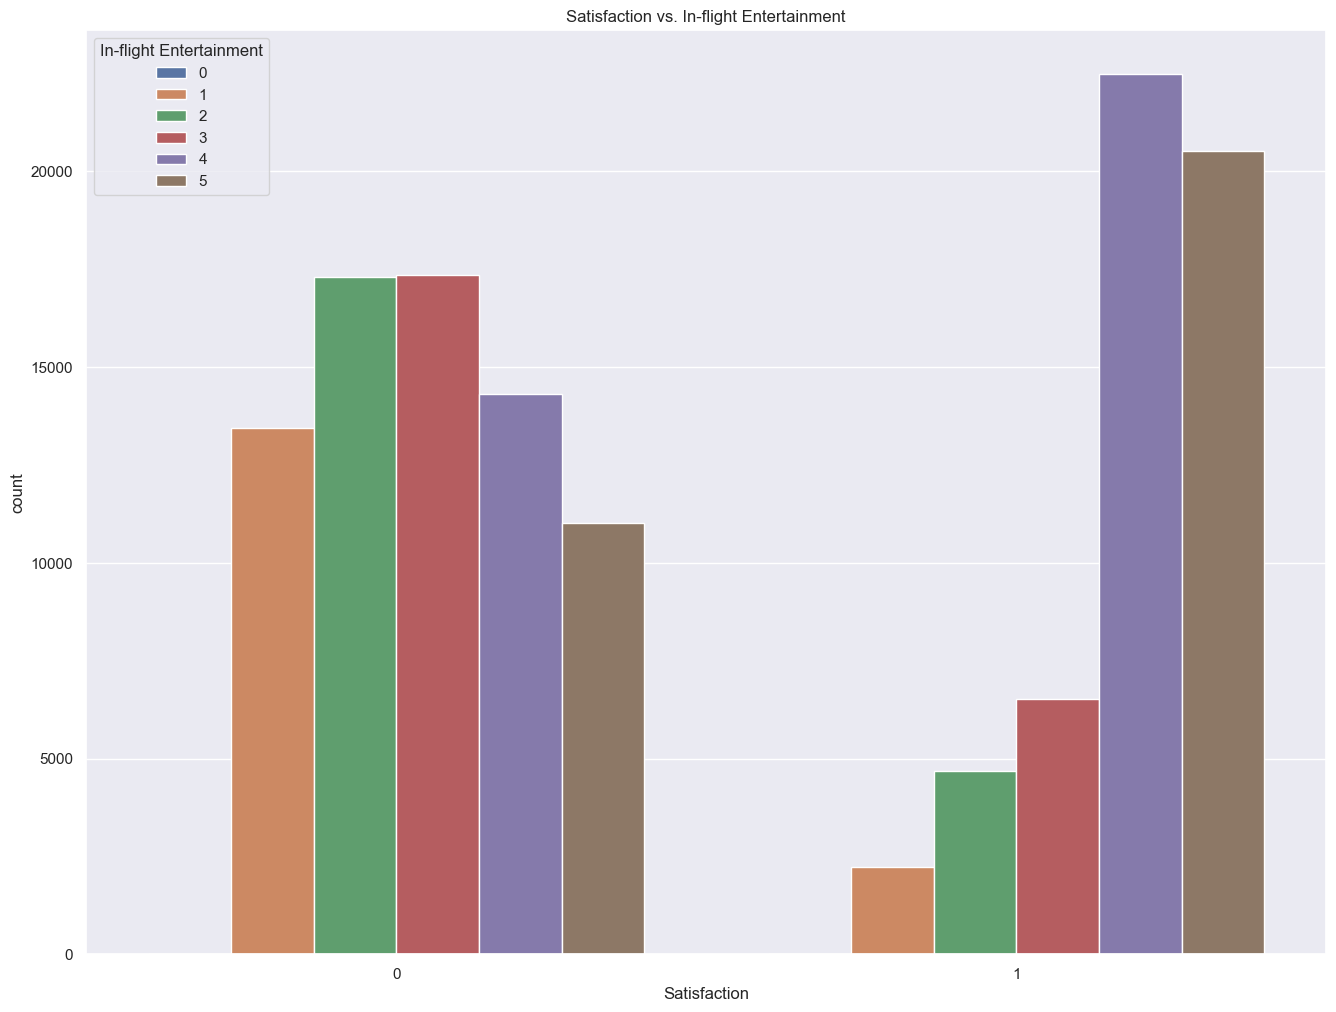

In [87]:
#1. Satisfaction vs. In-flight Entertainment
sb.countplot(data=airline_df,x='Satisfaction',
             hue='In-flight Entertainment').set(title='Satisfaction vs. In-flight Entertainment')

[Text(0.5, 1.0, 'Ease of Online Booking vs. In-flight Wifi Service')]

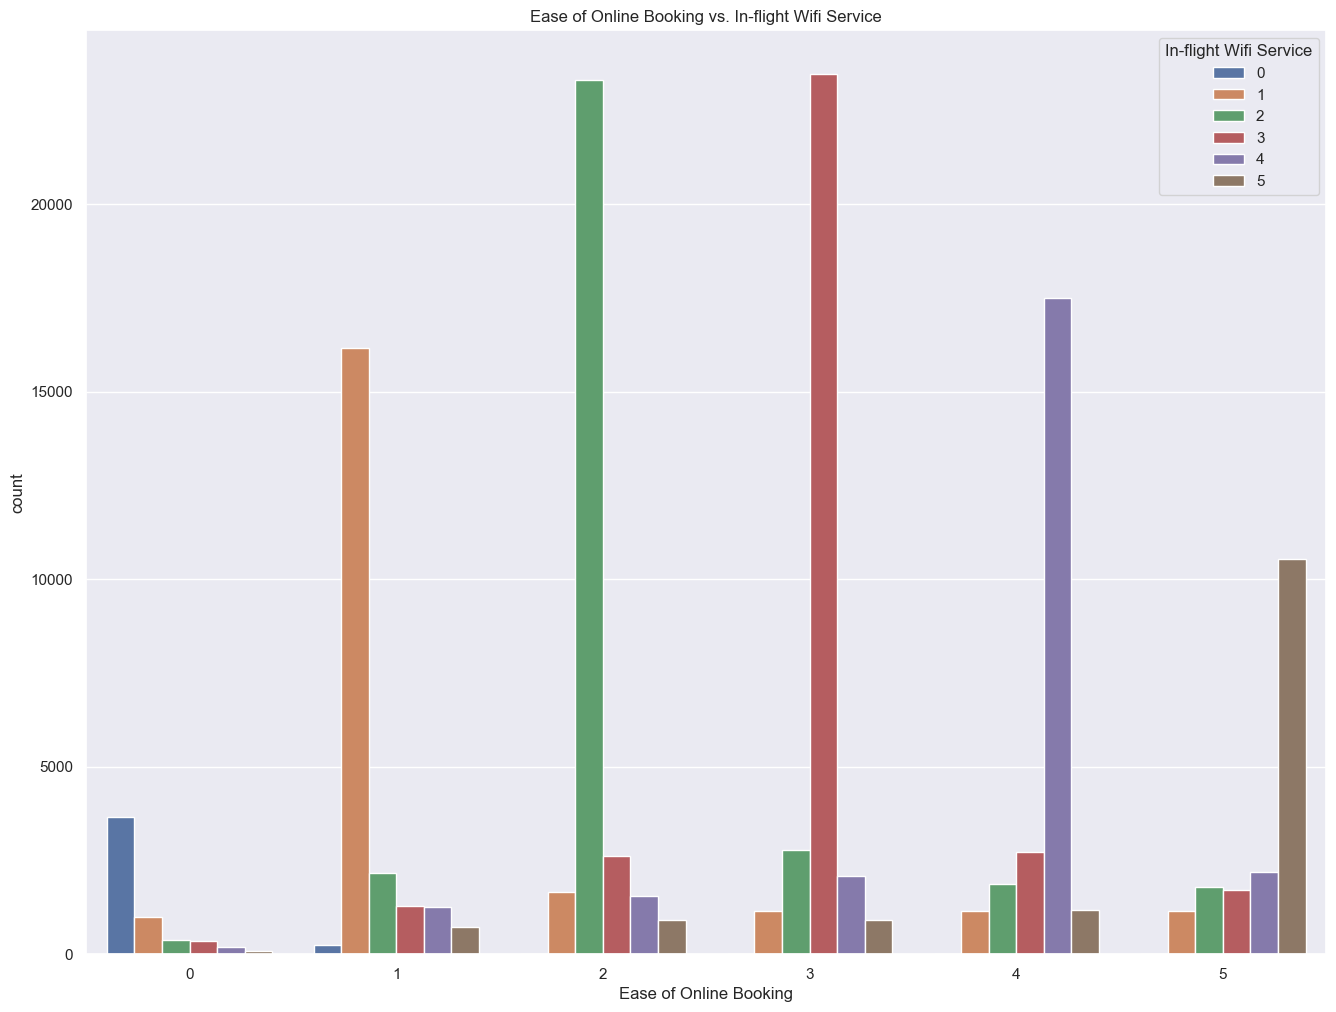

In [88]:
#1. Ease of Online Booking vs. In-flight Wifi Service
sb.countplot(data=airline_df,x='Ease of Online Booking',
             hue='In-flight Wifi Service').set(title='Ease of Online Booking vs. In-flight Wifi Service')


[Text(0.5, 1.0, 'Distribution of Flight Distance Based on Satisfaction')]

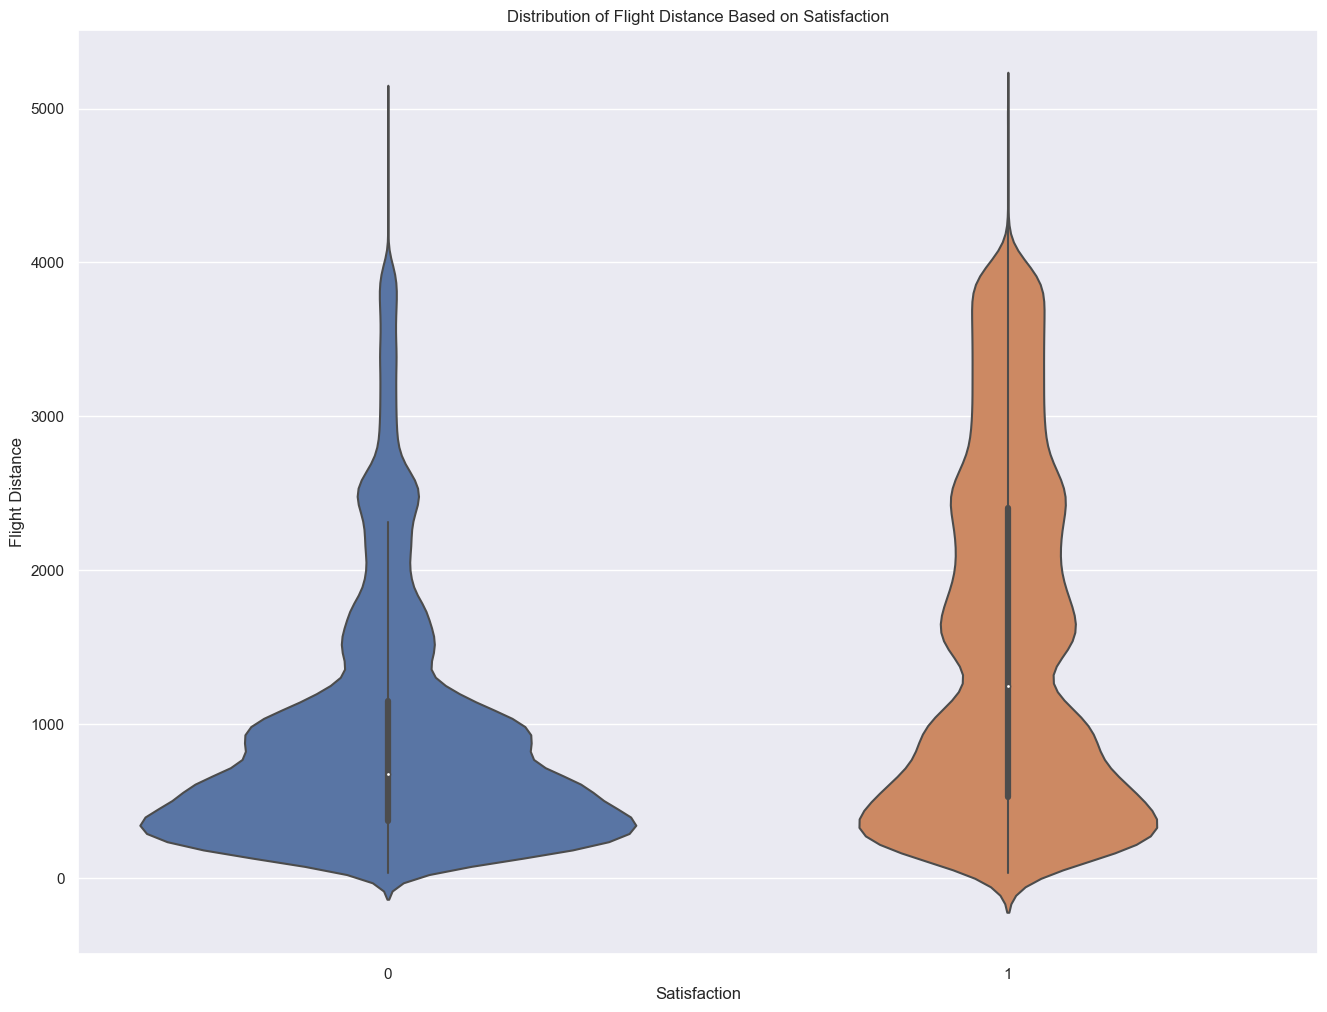

In [89]:
sb.violinplot(data=airline_df,x='Satisfaction',y='Flight Distance').set(title='Distribution of Flight Distance Based on Satisfaction')

#### Above we can see that flight distance did not influence satisfaction, so what this is reflecting is that passengers don't mind being on long flights, as long as they have access to good quality amenities.

[Text(0.5, 1.0, 'Count of Passenger Class Status By Gender')]

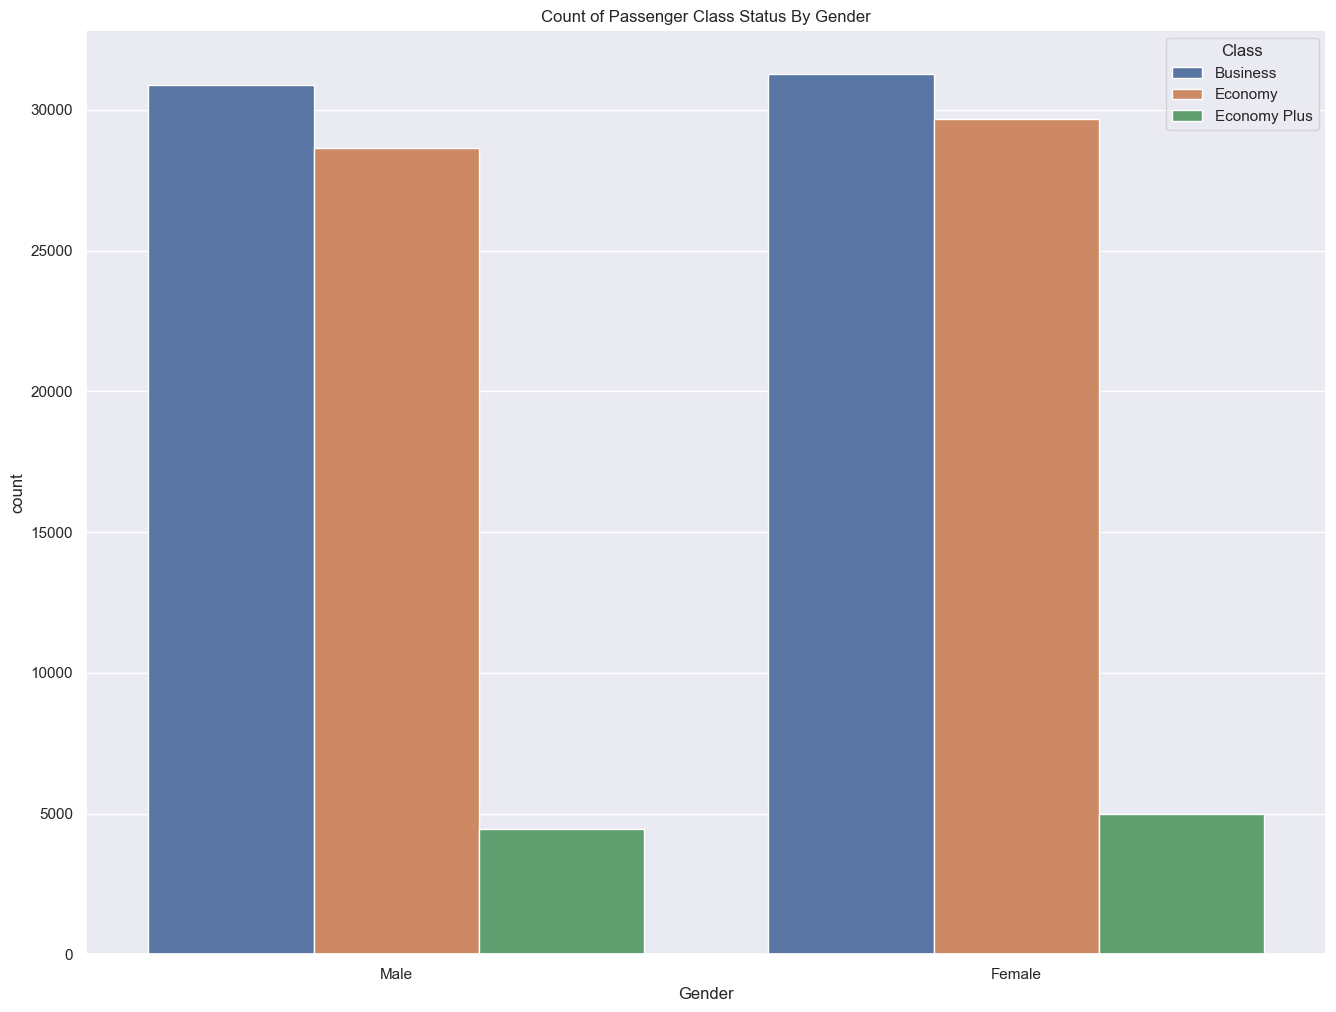

In [90]:
sb.countplot(data=airline_df,x='Gender',hue='Class').set(title='Count of Passenger Class Status By Gender')

[Text(0.5, 1.0, 'Count of Passenger Customer Type By Gender')]

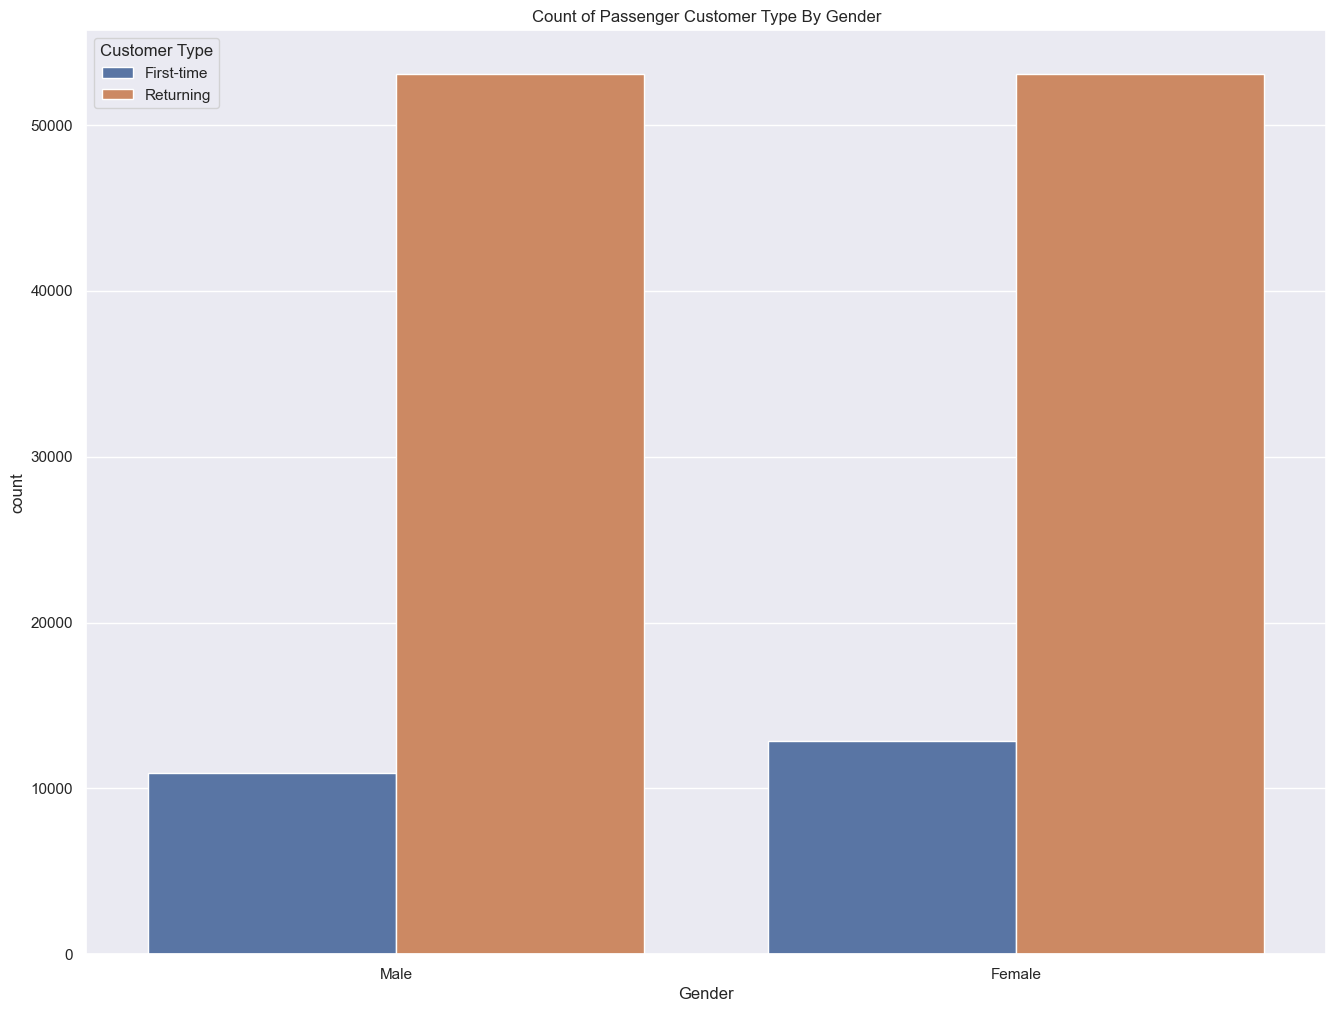

In [91]:
sb.countplot(data=airline_df,x='Gender',hue='Customer Type').set(title='Count of Passenger Customer Type By Gender')

### Takeaways from this EDA and Future Steps:
1. We have looked at the values/counts of our dataset and identified the correlations between the attributes by utilizing a heatmap.
2. We identified strong correlations between our attributes and also were able to examine the correlations for the 'Satisfaction' attribute, with **Online Boarding** having the greatest correlation at 0.5
3. Finally, we have plotted a few different of the correlations to visualize the dataset, specifically Gender vs. Other Attributes. This allowed us to identify that our dataset is clean and even in distribution, and ready for the next step.
4. In **Part 2 (Located in my Machine Learning Repo)**, we will continue utilizing this dataset along with machine learning models to identify the most influential attributes on customer satisfaction and to identify customer clusters based on their attributes.